In [385]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [386]:
msms_scan_number = 49607

In [387]:
# load the ms2 spectra for this feature in the APL
mq_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/index-{}.txt'.format(msms_scan_number), sep='\t', header=None, names=['mz','intensity'], usecols=[0,1])

In [388]:
mq_df['norm_intensity'] = mq_df.intensity / mq_df.intensity.max() * 100

In [389]:
import pickle

In [390]:
with open('/Users/darylwilding-mcbride/Downloads/mgf_spectra_experiment.pkl', 'rb') as f:
        mgf_spectra_l = pickle.load(f)


In [391]:
len(mgf_spectra_l)

5

In [392]:
feature_id = 822

In [393]:
features = [i for i in (x for x in mgf_spectra_l if 'Feature#: {} '.format(feature_id) in x['params']['TITLE'])]

In [394]:
print("there are {} ms2 spectra associated with this feature".format(len(features)))

there are 5 ms2 spectra associated with this feature


In [395]:
max_intensity = max([x['intensity array'].max() for x in features])

In [396]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

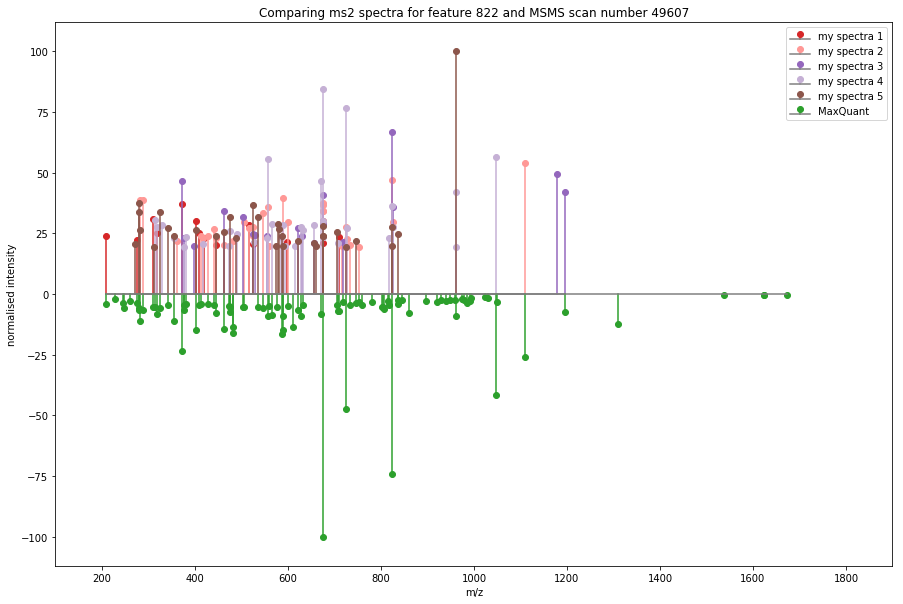

In [397]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.set_xlim((100,1900))

for i in range(len(features)):
    mz = features[i]['m/z array']
    intensity = features[i]['intensity array']
    my_df = pd.DataFrame.from_dict(list((mz, intensity))).T
    my_df.columns = ['mz','intensity']
    my_df['norm_intensity'] = my_df.intensity / max_intensity * 100
    
    markerline, stemlines, baseline = ax.stem(my_df.mz, my_df.norm_intensity, label='my spectra {}'.format(i+1))
    plt.setp(markerline, 'color', tableau20_mpl[i+6])
    plt.setp(stemlines, 'color', tableau20_mpl[i+6])
    plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(mq_df.mz, -mq_df.norm_intensity, 'g', label='MaxQuant')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms2 spectra for feature {} and MSMS scan number {}'.format(feature_id, msms_scan_number))
plt.show()